In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import time
import warnings
import torch.nn as nn
import pickle
from dataset_loader import *
from utils import *
import pandas as pd
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
from retrain_utils import *

SEED = 84
torch.manual_seed(SEED)
warnings.simplefilter("ignore")

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
dataset_name = 'corona'
ds = get_ds(dataset_name)

In [4]:
model_name = 'huawei-noah/TinyBERT_General_4L_312D'
folder_name = 'gru'

In [8]:
retrain_utils = RetrainUtils(model_name, dataset_name)
added_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.ADD)
removed_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.REMOVE)
replaced_train = retrain_utils.replace_sentences(ds['train'].to_pandas(), RetrainAction.REPLACE)

In [9]:
ds['train'] = removed_train

In [10]:
# 50 padding for sentiment, 64 for corona
set_seed()    
model = MyGRU(model_name, hidden_dim=256, num_layers=2, output_dim=2, dropout=0.0)
tokenized_data = tokenize_dataset(ds, tokenizer_name=model_name, max_length = 64)
train(model, tokenized_data, path=f'{folder_name}/{dataset_name}/check', num_train_epochs=20)

Some weights of the model checkpoint at huawei-noah/TinyBERT_General_4L_312D were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'fit_denses.2.bias', 'fit_denses.3.weight', 'fit_denses.0.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'fit_denses.4.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'fit_denses.0.weight', 'fit_denses.1.bias', 'fit_denses.3.bias', 'fit_denses.2.weight', 'fit_denses.4.bias', 'fit_denses.1.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a

  0%|          | 0/6497 [00:00<?, ?ex/s]

  0%|          | 0/2000 [00:00<?, ?ex/s]

The following columns in the training set don't have a corresponding argument in `MyGRU.forward` and have been ignored: token_type_ids, attention_mask. If token_type_ids, attention_mask are not expected by `MyGRU.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 6497
  Num Epochs = 20
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 4080


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.693168,0.513000
2,No log,0.693613,0.505500
3,0.693200,0.693115,0.516500
4,0.693200,0.692970,0.518000
5,0.691800,0.695147,0.481000
6,0.691800,0.689871,0.528000
7,0.691800,0.558747,0.722500
8,0.629500,0.500876,0.760000
9,0.629500,0.506302,0.785500
10,0.338900,0.497829,0.789000


The following columns in the evaluation set don't have a corresponding argument in `MyGRU.forward` and have been ignored: token_type_ids, attention_mask. If token_type_ids, attention_mask are not expected by `MyGRU.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to gru/corona/check/checkpoint-204
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
The following columns in the evaluation set don't have a corresponding argument in `MyGRU.forward` and have been ignored: token_type_ids, attention_mask. If token_type_ids, attention_mask are not expected by `MyGRU.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to gru/corona/check/checkpoint-408
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
The following columns in the evaluation set don't have a corresponding argum

TrainOutput(global_step=4080, training_loss=0.35527397078626294, metrics={'train_runtime': 69.6537, 'train_samples_per_second': 1865.515, 'train_steps_per_second': 58.576, 'total_flos': 0.0, 'train_loss': 0.35527397078626294, 'epoch': 20.0})

In [19]:
torch.save(model.state_dict(), f'{folder_name}/{dataset_name}/updated_model/pytorch_model.bin')

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

### saved best model's folder as 'updated_model'

In [6]:
model = load_gru(f'{folder_name}/{dataset_name}/updated_model').to(device)
model = model.eval()

Some weights of the model checkpoint at huawei-noah/TinyBERT_General_4L_312D were not used when initializing BertForSequenceClassification: ['fit_denses.0.bias', 'fit_denses.1.bias', 'fit_denses.3.bias', 'fit_denses.2.weight', 'cls.predictions.transform.LayerNorm.bias', 'fit_denses.2.bias', 'cls.seq_relationship.bias', 'fit_denses.1.weight', 'cls.predictions.transform.dense.bias', 'fit_denses.3.weight', 'fit_denses.4.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'fit_denses.0.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'fit_denses.4.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a

In [7]:
orig_model = load_gru(f'{folder_name}/{dataset_name}/model').to(device)
orig_model = orig_model.eval()

Some weights of the model checkpoint at huawei-noah/TinyBERT_General_4L_312D were not used when initializing BertForSequenceClassification: ['fit_denses.0.bias', 'fit_denses.1.bias', 'fit_denses.3.bias', 'fit_denses.2.weight', 'cls.predictions.transform.LayerNorm.bias', 'fit_denses.2.bias', 'cls.seq_relationship.bias', 'fit_denses.1.weight', 'cls.predictions.transform.dense.bias', 'fit_denses.3.weight', 'fit_denses.4.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'fit_denses.0.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'fit_denses.4.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a

In [8]:
tokenized_data = tokenize_dataset(ds, tokenizer_name=model_name, max_length = 64)

  0%|          | 0/8000 [00:00<?, ?ex/s]

  0%|          | 0/2000 [00:00<?, ?ex/s]

In [9]:
train(model, tokenized_data, path=f'{folder_name}/{dataset_name}', evaluate = True)

The following columns in the evaluation set don't have a corresponding argument in `MyGRU.forward` and have been ignored: token_type_ids, attention_mask. If token_type_ids, attention_mask are not expected by `MyGRU.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 1


{'eval_loss': 0.6780754923820496,
 'eval_accuracy': 0.8065,
 'eval_runtime': 4.5852,
 'eval_samples_per_second': 436.183,
 'eval_steps_per_second': 436.183}

In [28]:
ensemble = Ensemble(model, orig_model, 1)
calc_accuracy(ensemble, ds['test'], tokenizer)[0]

0.8185

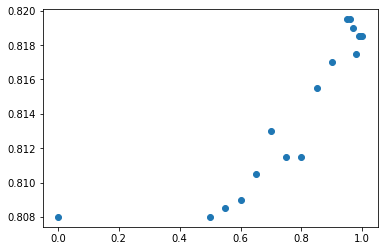

In [29]:
ths = [0.0, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 0.96, 0.97, 0.98, 0.99, 0.993, 1]
accs = []
for th in ths:
    ensemble = Ensemble(model, orig_model, th)
    acc = calc_accuracy(ensemble, ds['test'], tokenizer)[0]
    accs.append(acc)
_ = plt.scatter(ths, accs)

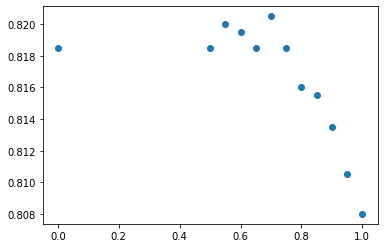

In [30]:
ths = [0.0, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1]
accs = []
for th in ths:
    ensemble = Ensemble(orig_model, model, th)
    acc = calc_accuracy(ensemble, ds['test'], tokenizer)[0]
    accs.append(acc)
_ = plt.scatter(ths, accs)

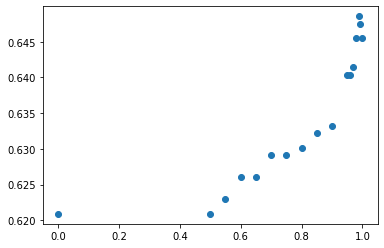

In [31]:
counter = get_ds('counter')['test']
ths = [0.0, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 0.96, 0.97, 0.98, 0.99, 0.993, 1]
accs = []
for th in ths:
    ensemble = Ensemble(model, orig_model, th)
    acc = calc_accuracy(ensemble, counter, tokenizer)[0]
    accs.append(acc)
_ = plt.scatter(ths, accs)

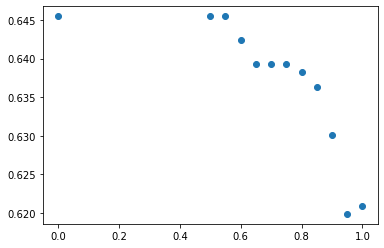

In [32]:
counter = get_ds('counter')['test']
ths = [0.0, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1]
accs = []
for th in ths:
    ensemble = Ensemble(orig_model, model, th)
    acc = calc_accuracy(ensemble, counter, tokenizer)[0]
    accs.append(acc)
_ = plt.scatter(ths, accs)

In [ ]:
def predict_sentences(sentences, m):
    encoded = [[101] +[tokenizer._convert_token_to_id_with_added_voc(token) for token in tokens] + [102]         
               for tokens in sentences]
    to_pred = torch.tensor(encoded, device=device)
    outputs = m(to_pred)[0]
    print(outputs)
    return torch.argmax(outputs, dim=1).cpu().numpy()

In [13]:
predict_sentences([tokenizer.tokenize("i hate movies")])

tensor([[ 1.7911, -1.7094]], device='cuda:0', grad_fn=<AddmmBackward0>)


array([0])

In [14]:
predict_sentences([tokenizer.tokenize("i love movies")])

tensor([[-2.3436,  2.2181]], device='cuda:0', grad_fn=<AddmmBackward0>)


array([1])